In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize = (15,8))

In [2]:
cards = pd.read_csv('data/dataset-cards.csv', sep = ';')

In [3]:
cards

,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993
496,6042-2856-7280-2925,Gold,33000,CC26787
497,8706-3809-5167-3899,Premium,144000,CC32532
498,9540-8558-5897-5046,Premium,830000,CC90246


In [4]:
cards.drop_duplicates(subset= ['card_number'], keep= 'first')

,card_number,card_family,credit_limit,customer_id
0,8638-5407-3631-8196,Premium,530000,CC67088
1,7106-4239-7093-1515,Gold,18000,CC12076
2,6492-5655-8241-3530,Premium,596000,CC97173
3,2868-5606-5152-5706,Gold,27000,CC55858
4,1438-6906-2509-8219,Platinum,142000,CC90518
...,...,...,...,...
495,4708-4407-9601-6022,Premium,691000,CC64993
496,6042-2856-7280-2925,Gold,33000,CC26787
497,8706-3809-5167-3899,Premium,144000,CC32532
498,9540-8558-5897-5046,Premium,830000,CC90246


In [5]:
list(cards['card_family'].drop_duplicates())

['Premium', 'Gold', 'Platinum']

In [6]:
group_card_family = cards.groupby('card_family')

In [7]:
data_per_card_family_credit = group_card_family['credit_limit'].describe().round(2)

In [8]:
data_per_card_family_credit

,count,mean,std,min,25%,50%,75%,max
card_family,,,,,,,,
Gold,181.0,27878.45,13495.13,2000.0,17000.0,28000.0,38000.0,50000.0
Platinum,112.0,131294.64,43272.37,51000.0,101500.0,136500.0,166250.0,200000.0
Premium,207.0,514763.29,232013.74,108000.0,325000.0,516000.0,710000.0,899000.0


In [9]:
cards['credit_limit'].describe().round(2)

count       500.00
mean     252614.00
std      269881.77
min        2000.00
25%       35000.00
50%      139000.00
75%      412500.00
max      899000.00
Name: credit_limit, dtype: float64

<AxesSubplot:title={'center':'credit_limit'}, xlabel='[card_family]'>

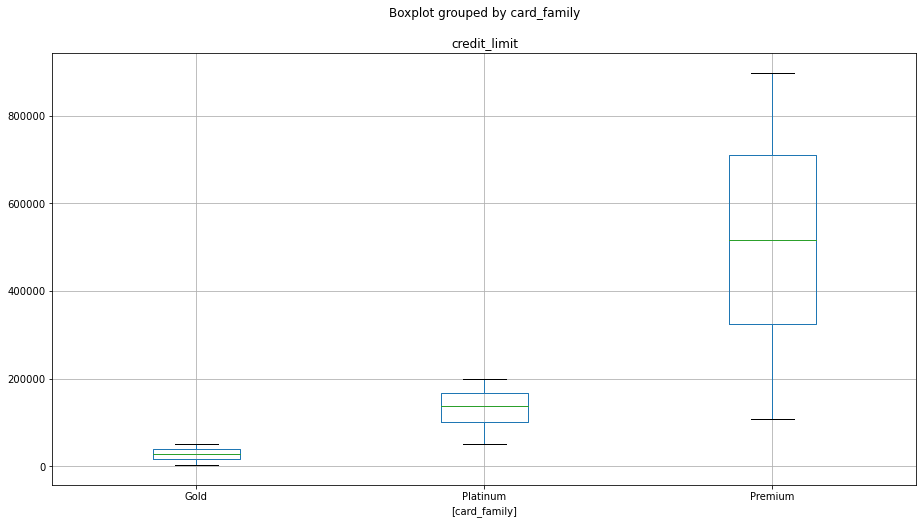

In [10]:
cards.boxplot(['credit_limit'], by = ['card_family'])

Através do card_limit é possível concluir que o ranqueamento do card_family é feito considerando os intervalos a seguir:
- Gold = [ 2.000 ; 50.000 ]
 
- Platinum = [ 51.000 ; 200.000 ]
 
- Premium: Para o Premium não foi possível determinar um intervalo especifico, uma vez que não foram encontrados outliers dentro do boxplot e o limite minimo é de 108.000 que estaria dentro do intervalo Platinum, o que permite concluir que para o ranqueamento Premium não é só considerado o card_limit. Outra conclusão que pode ser obtida é que se o card_limit for superior a 200.000 a card_family será definida como Premium.